# Import

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [102]:
df1 = pd.read_csv("calories.csv")
df2 = pd.read_csv("exercise.csv")

In [103]:
df = pd.merge(df1, df2, on='User_ID', how='inner')  # inner join by default
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [104]:
df.shape

(15000, 9)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [106]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


# Plot to analyse data

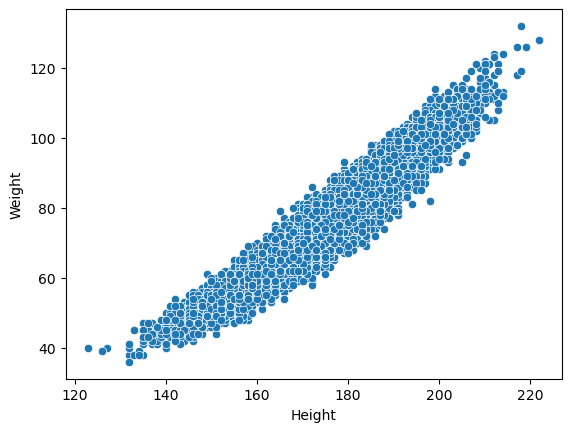

In [107]:
sns.scatterplot(x='Height', y='Weight', data=df)
plt.show()

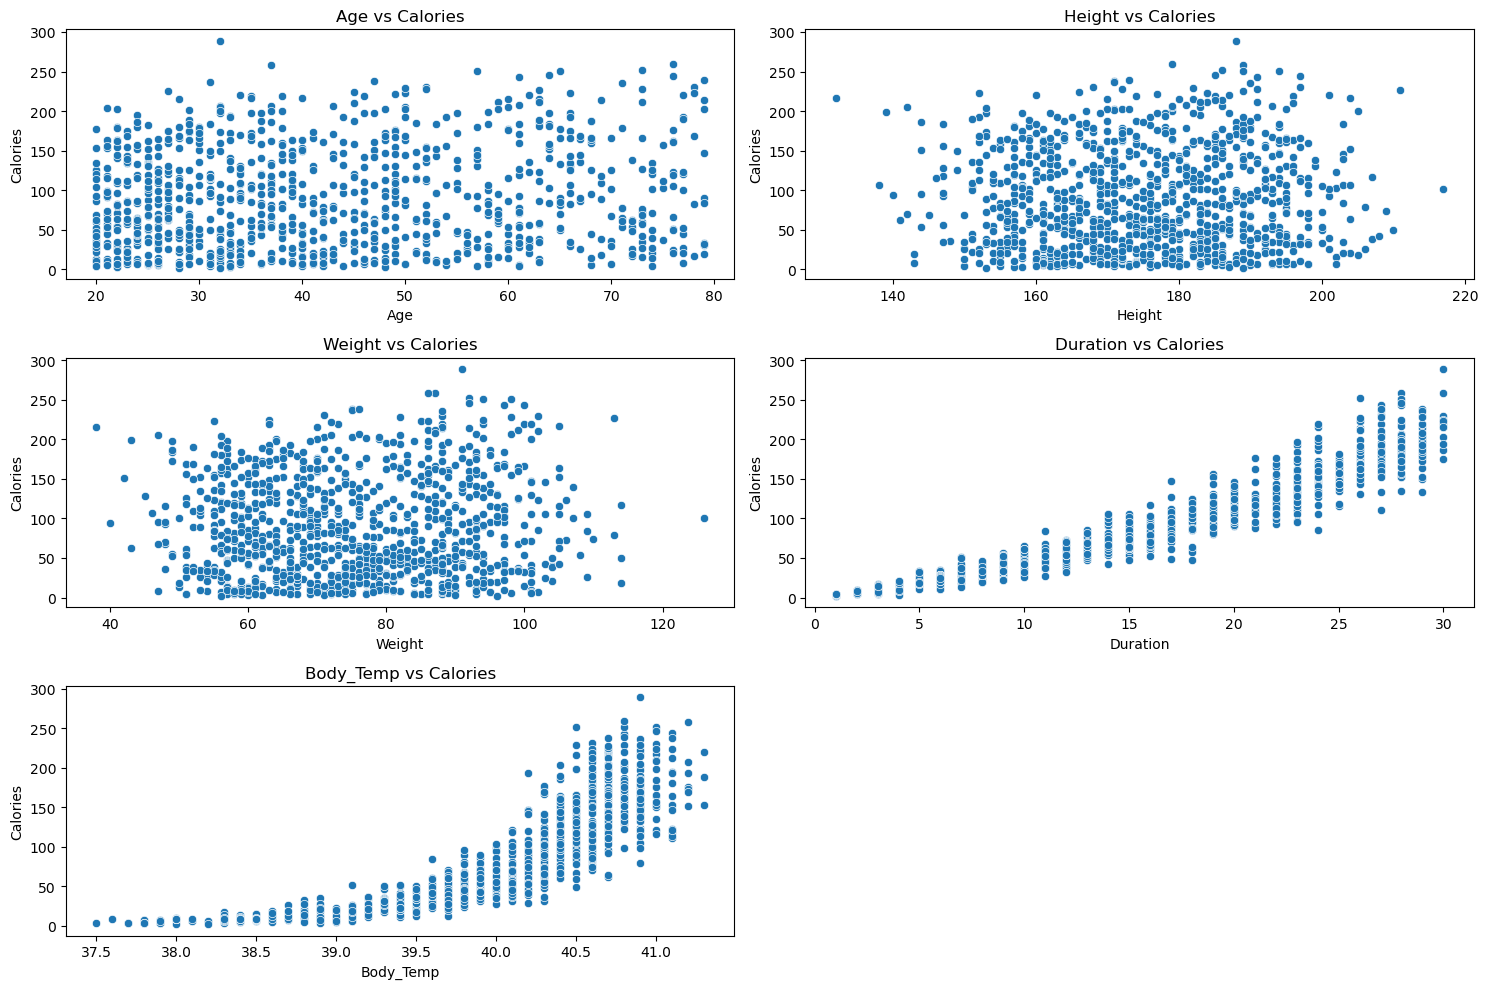

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Height', 'Weight', 'Duration', 'Body_Temp']
x = df.sample(1000)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # Create 3x2 grid
axes = axes.flatten()  # Flatten the 2D array to make indexing easier

for i, col in enumerate(features):
    sns.scatterplot(x=col, y='Calories', data=x, ax=axes[i])  # Plot on the i-th axis
    axes[i].set_title(f'{col} vs Calories')

#Hide the unused subplot (6th one in 3x2 grid)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


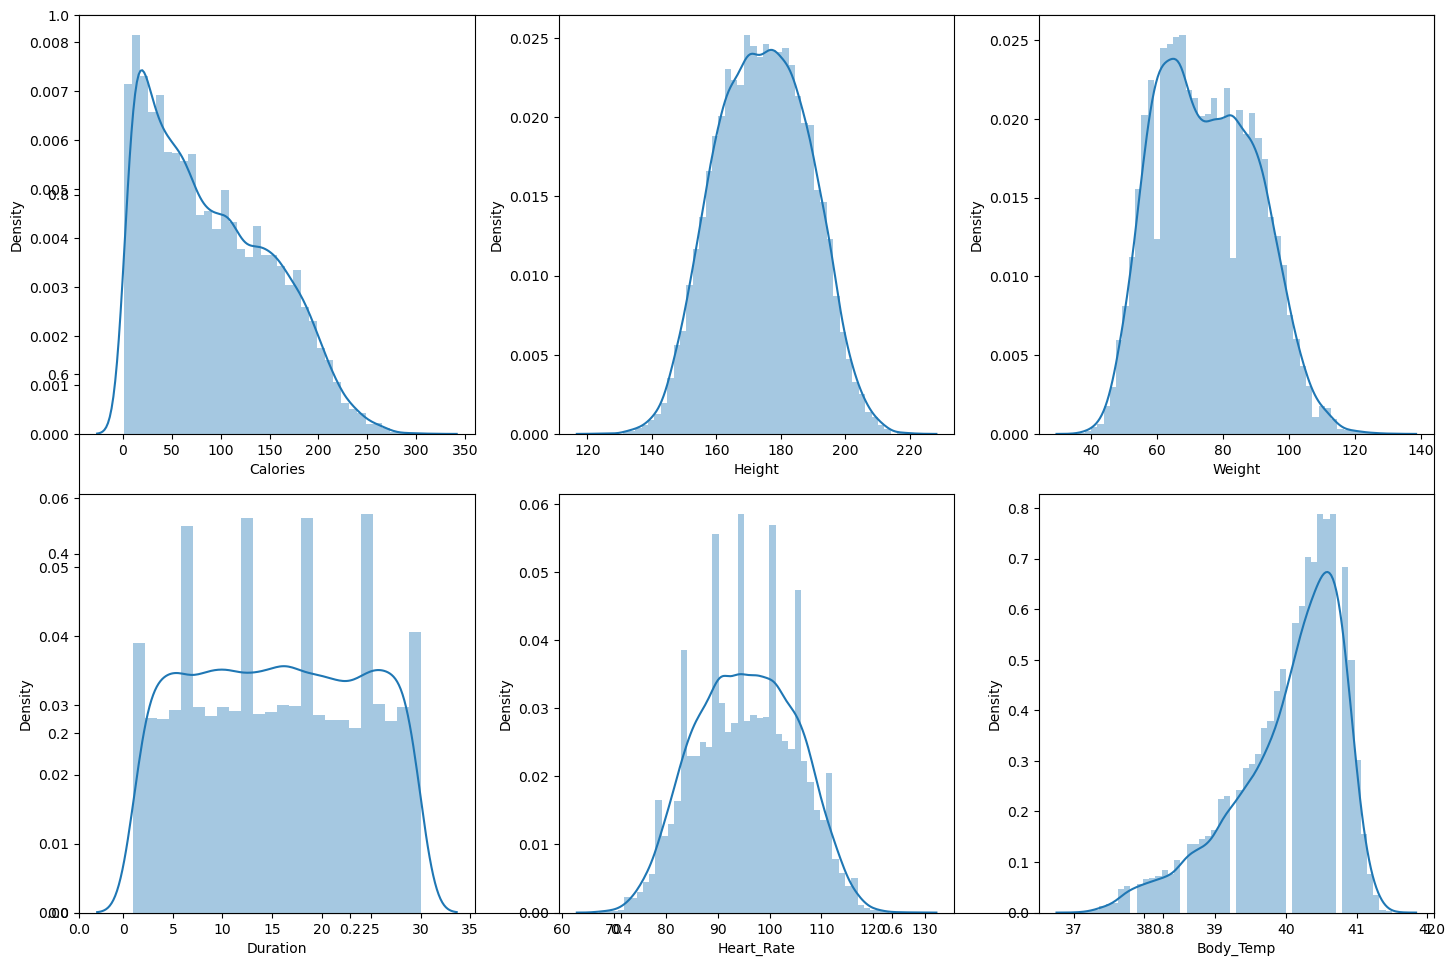

In [109]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [110]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


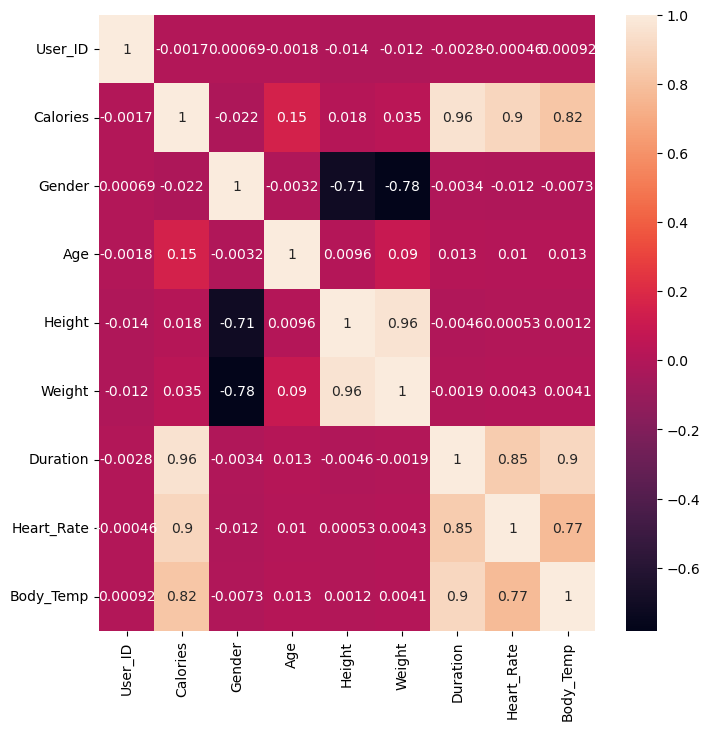

In [111]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),
           annot=True,
           cbar=True)
plt.show()

# VIF

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[["Gender",	"Age",	"Height",	"Weight",	"Duration",	"Heart_Rate",	"Body_Temp"]]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_data, i)
                          for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0      Gender   2.818870
1         Age   1.124743
2      Height  14.276551
3      Weight  18.651715
4    Duration   8.059147
5  Heart_Rate   3.669456
6   Body_Temp   5.427428


In [113]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = df[["Calories", "Gender",	"Age",	"Height",	"Weight",	"Duration",	"Heart_Rate",	"Body_Temp"]]

# scaler = StandardScaler()
# X_data = scaler.fit_transform(X)

# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns

# vif_data["VIF"] = [variance_inflation_factor(X_data, i) for i in range(len(X.columns))]
# print(vif_data)

In [114]:
# to_remove = ['Body_Temp']
# df.drop(to_remove, axis=1, inplace=True)

In [115]:
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

In [116]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8,26.038781
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3,21.773842
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7,24.655910
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5,22.159109
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8,24.456063


In [117]:
# X = df.drop(['User_ID', 'Calories','Height', 'Weight'], axis=1)
X = df.drop(['User_ID', 'Calories', 'BMI'], axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((12000, 7), (3000, 7))

In [118]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')

    y_pred = models[i].predict(X_train)
    print('Training MSE Error : ', mse(y_train, y_pred))
    print('Training MAE Error : ', mae(y_train, y_pred))
    print('Training R2 score : ', r2_score(y_train, y_pred))

    test_preds = models[i].predict(X_test)
    print('Test MSE Error : ', mse(y_test, test_preds))
    print('Test MAE Error : ', mae(y_test, test_preds))
    print('Test Error : ', r2_score(y_test, test_preds))
    print()

LinearRegression() : 
Training MSE Error :  126.94582456688235
Training MAE Error :  8.306790197742504
Training R2 score :  0.9671621074066676
Test MSE Error :  131.99574575081695
Test MAE Error :  8.441513553849706
Test Error :  0.9672937151257295



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training MSE Error :  1.63245658264028
Training MAE Error :  0.9447468986184492
Training R2 score :  0.9995777219604748
Test MSE Error :  4.568956111227719
Test MAE Error :  1.4981198125282924
Test Error :  0.9988678909361673

Lasso() : 
Training 

In [120]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import SGDRegressor, LinearRegression
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split, learning_curve
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error

# epochs = 100
# train_mse = []
# val_mse = []

# sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='invscaling', eta0=0.01,
#                    random_state=42, warm_start=True)
# for epoch in range(epochs):
#     sgd.partial_fit(X_train, y_train)
#     train_pred = sgd.predict(X_train)
#     val_pred = sgd.predict(X_test)
#     train_mse.append(mean_squared_error(y_train, train_pred))
#     val_mse.append(mean_squared_error(y_test, val_pred))

# plt.figure()
# plt.plot(range(1, epochs+1), train_mse, label='Train MSE')
# plt.plot(range(1, epochs+1), val_mse, label='Validation MSE')
# plt.xlabel('Epoch')
# plt.ylabel('Mean Squared Error')
# plt.title('SGDRegressor MSE vs. Epochs')
# plt.legend()
# plt.show()

# # 2) Learning Curve (MSE vs. Training-Set Size) for LinearRegression
# lr = LinearRegression()
# train_sizes, train_scores, val_scores = learning_curve(
#     lr, X, y,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     cv=5,
#     scoring='neg_mean_squared_error',
#     shuffle=True,
#     random_state=42
# )

# train_mse_mean = -train_scores.mean(axis=1)
# val_mse_mean = -val_scores.mean(axis=1)

# plt.figure()
# plt.plot(train_sizes, train_mse_mean, marker='o', label='Train MSE')
# plt.plot(train_sizes, val_mse_mean, marker='o', label='Validation MSE')
# plt.xlabel('Training Set Size')
# plt.ylabel('Mean Squared Error')
# plt.title('Learning Curve (MSE) for LinearRegression')
# plt.legend()
# plt.show()


In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [122]:
model = Lasso()
model.fit(X_train_poly, y_train)
train_preds = model.predict(X_train_poly)
print('Training MSE Error : ', mse(y_train, train_preds))
print('Training MAE Error : ', mae(y_train, train_preds))

test_preds = model.predict(X_test_poly)
print('Validation MSE Error : ', mse(y_test, test_preds))
print('Validation MAE Error : ', mae(y_test, test_preds))
print()

Training MSE Error :  13.231040779076551
Training MAE Error :  2.584656630226469
Validation MSE Error :  13.747863717846174
Validation MAE Error :  2.5990367818546964



# Findings:
the VIF shows that we need to combine height and weight into BMI, but

before combining:
Training MSE Error :  13.231040779076551
Training MAE Error :  2.584656630226469
Validation MSE Error :  13.747863717846174
Validation MAE Error :  2.5990367818546964

after combining:
Training MSE Error :  19.16806541885516
Training MAE Error :  3.084507356896053
Validation MSE Error :  19.851512765505422
Validation MAE Error :  3.1099883235264607

## Key  Insight:
Removing multicollinearity is not always the best choice if your main goal is prediction.

In [123]:
# Define the actual user input as a DataFrame
user_input = pd.DataFrame([{
    'Gender': 1,        # Will be encoded
    'Age': 23,
    'Height': 1.82,
    'Weight': 70,
    'Duration': 70,
    'Heart_Rate': 120,
    'Body_Temp': 40.0,
    # 'BMI' : 21.13
}])

# Scale features using the same scaler
user_scaled = scaler.transform(user_input)
user_scaled_poly = poly.fit_transform(user_scaled)
# Predict calories burned
predicted_calories = model.predict(user_scaled_poly)[0]

print(f"Predicted Calories Burned: {predicted_calories:.2f} kcal")

Predicted Calories Burned: 846.20 kcal


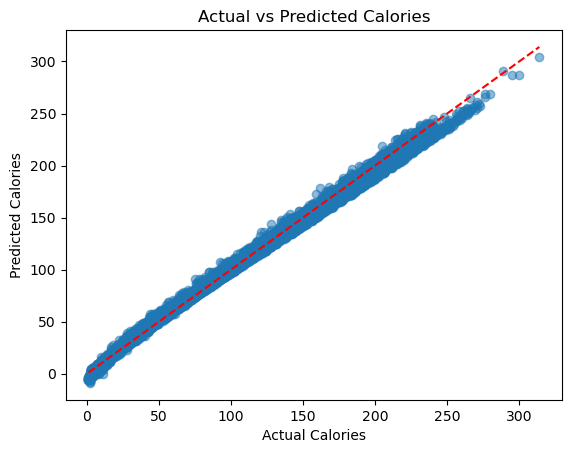

In [124]:
# Plot actual vs predicted (train)
plt.scatter(y_train, train_preds, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

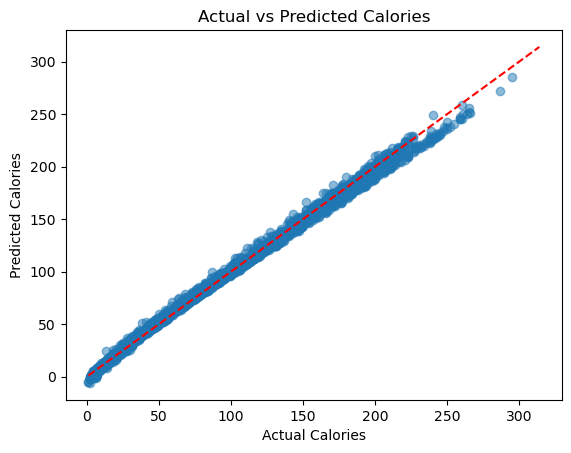

In [125]:
# Plot actual vs predicted (test)
plt.scatter(y_test, test_preds, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

multi-collinearity (VIF)
PCA(Principle Component Analysis)

-14.121579853359378


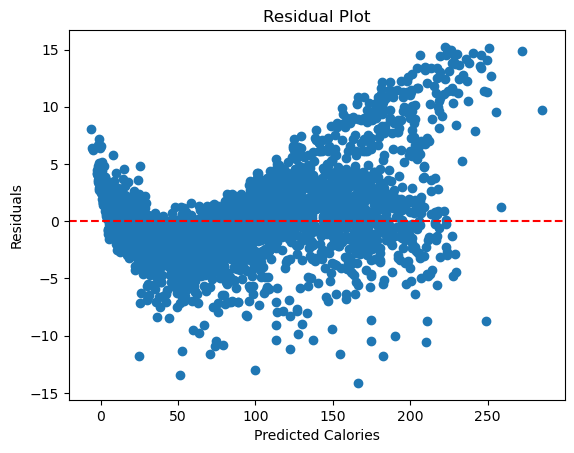

In [126]:
residuals = y_test - test_preds
print(residuals.min())
plt.scatter(test_preds, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


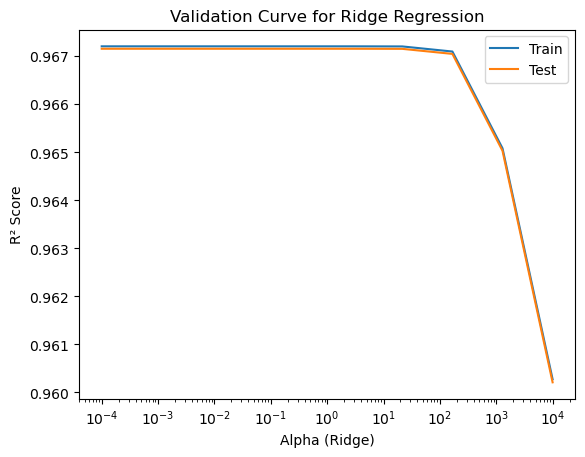

In [127]:
from sklearn.model_selection import validation_curve

alphas = np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=alphas, scoring="r2", cv=5)

plt.plot(alphas, train_scores.mean(axis=1), label="Train")
plt.plot(alphas, test_scores.mean(axis=1), label="Test")
plt.xscale("log")
plt.xlabel("Alpha (Ridge)")
plt.ylabel("R² Score")
plt.legend()
plt.title("Validation Curve for Ridge Regression")
plt.show()

In [128]:
# from sklearn.linear_model import lasso_path

# alphas_lasso, coefs_lasso, _ = lasso_path(X.values, y.values, alphas=np.logspace(-2, 1, 100))

# plt.plot(alphas_lasso, coefs_lasso.T)
# plt.xscale("log")
# plt.xlabel("Alpha")
# plt.ylabel("Coefficient Value")
# plt.title("Lasso Path")
# plt.show()


In [129]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import Ridge

# alphas = np.logspace(-4, 4, 50)
# ridge_cv_scores = [cross_val_score(Ridge(alpha=a), X, y, cv=5, scoring="r2").mean() for a in alphas]

# plt.plot(alphas, ridge_cv_scores)
# plt.xscale("log")
# plt.xlabel("Alpha (Ridge)")
# plt.ylabel("CV R² Score")
# plt.title("Cross-Validation Score vs Alpha")
# plt.show()


Text(0.5, 1.0, 'Distribution of Residuals')

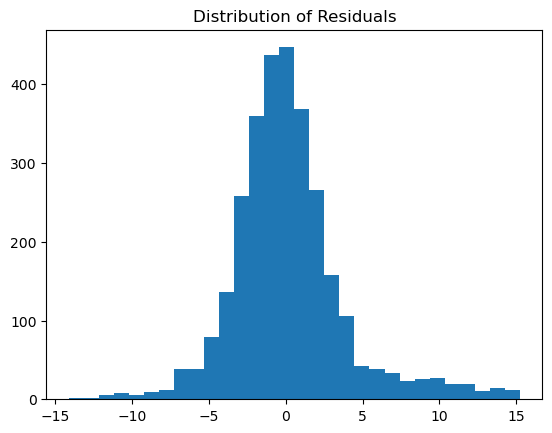

In [130]:
plt.hist(residuals, bins=30)
plt.title("Distribution of Residuals")


# Create a joblib file

In [133]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(poly, "poly.pkl")
joblib.dump(model, "lasso_model.pkl")

['lasso_model.pkl']

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  int64  
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
 9   BMI         15000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.1 MB
